## Chapter 4 -  Training Models

### Logistic Regression

A good wary to reduce overfitting is to regularise the model (to constrain it). The fewer degrees of freedom the model has, the harder it will be to overfit the data. As seen earlier, one way to regularise a model is to reduce the number of polynomial degrees.

There are other ways to regularise the model, in particular constraining the weights of the model. Three ways to do so are Ridge regression, Lasso regression and Elastic Net.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [24]:
iris = datasets.load_iris()
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
display(X.head())
y = pd.Series([1 if t else 0 for t in list(iris['target']==2) ])
display(y.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    0
1    0
2    0
3    0
4    0
dtype: int64

In [39]:
reg = LogisticRegression()
reg.fit(np.c_[X.iloc[:,3]], y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
train_df = pd.DataFrame({'X' : iris['data'][:,3], 'y' : y})
train_df.head()

,X,y
0,0.2,0
1,0.2,0
2,0.2,0
3,0.2,0
4,0.2,0


In [61]:
lin_X = np.linspace(0,3,1000).reshape(-1,1)
y_prob = reg.predict_proba(lin_X)
pred_df = pd.DataFrame({'X' : lin_X.flatten(), 'y0' : y_prob[:,0], 'y1': y_prob[:,1]})
display(pred_df.head())

,X,y0,y1
0,0.000000,0.99925,0.00075
1,0.003003,0.99924,0.00076
2,0.006006,0.99923,0.00077
3,0.009009,0.99922,0.00078
4,0.012012,0.99921,0.00079


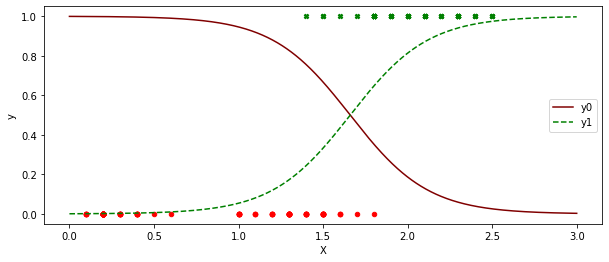

In [65]:
# Plotting for different alpha values
fig, ax = plt.subplots(figsize=(10,4))
train_df[train_df.y==0].plot(kind='scatter', x='X', y='y', ax=ax, color='red')
train_df[train_df.y==1].plot(kind='scatter', x='X', y='y', ax=ax, color='green', marker='X')
pred_df.plot(kind='line', x='X', y='y0', ax=ax, color='maroon')
pred_df.plot(kind='line', x='X', y='y1', ax=ax, color='green', style='--')
# df_results3.plot(kind='line', x='X', y='y', ax=ax, color='orange', style='-')
# ax.legend(['alpha=0','alpha=10000', 'alpha=100000', 'sample'])
plt.show()

Note that logistic regression assume that the model and the output are linearly correlated.

### Softmax Regression